In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('/content/IBM Attrition Data.csv')
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


In [ ]:
df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [ ]:
df = df[['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 
         'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked','WorkLifeBalance', 'YearsAtCompany']]

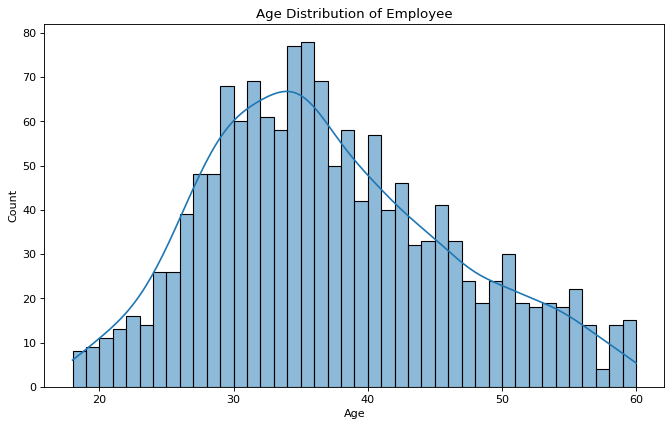

In [ ]:
# histogram for age

plt.figure(figsize=(10,6), dpi=80)
sns.histplot(data=df, x='Age', bins=42, kde=True).set_title('Age Distribution of Employee');

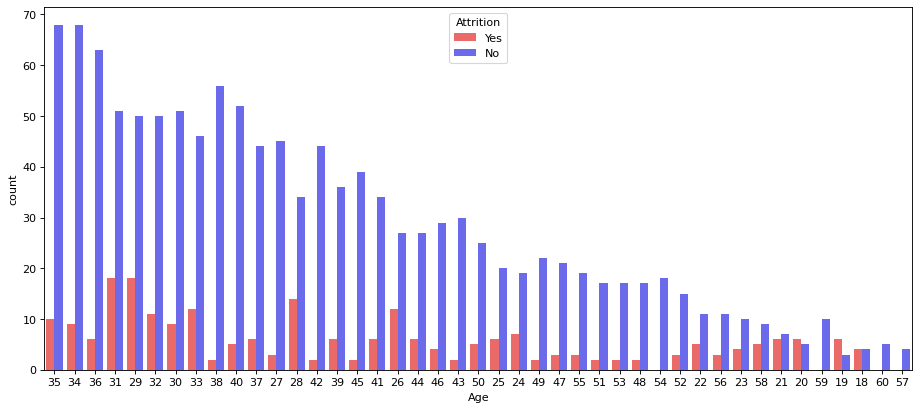

In [ ]:
# print(df[(df['Attrition'] == 'Yes')].groupby('Age')['Age'].count().sort_values(ascending=False))

plt.figure(figsize=(14,6), dpi=80)
sns.countplot(data=df, x='Age', hue='Attrition', order = df['Age'].value_counts().index, palette='seismic_r').set_title
('Attrition by Age');

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64


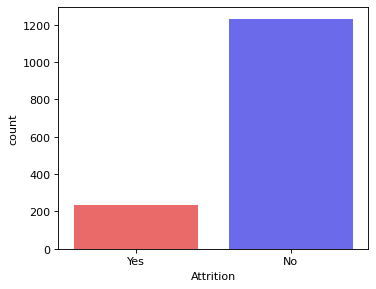

In [ ]:
print(df.groupby('Attrition')['Attrition'].count())

plt.figure(figsize=(5,4), dpi=80)
sns.countplot(data=df, x='Attrition', palette='seismic_r');

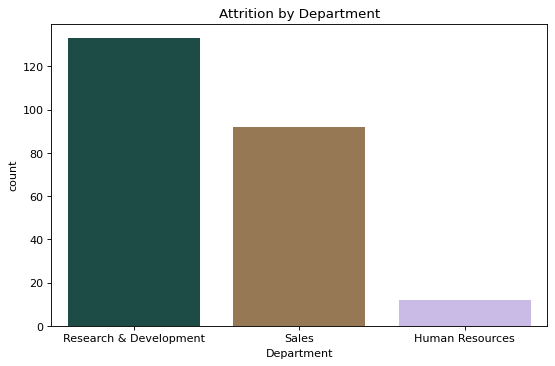

In [5]:
# print(df[(df['Attrition'] == 'Yes')].groupby('Department')['Attrition'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='Department', palette='cubehelix', order = df['Department']
              .value_counts().index).set_title('Attrition by Department');

In [6]:
agerange = []
for age in df["Age"]:
    if age >= 18 and age < 24:
        agerange.append("18-24")
    elif age >= 25 and age < 31:
        agerange.append("25-31")
    elif age >= 32 and age < 38:
        agerange.append("32-38")
    elif age >= 39 and age < 45:
        agerange.append("39-45")
    elif age >= 46 and age < 52:
        agerange.append("46-52")
    elif age >= 53 and age < 59:
        agerange.append("53-59")
    else:
        agerange.append("60-66")
       
df["AgeRange"] = agerange
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,AgeRange
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,39-45
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,46-52
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,32-38
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,32-38
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,25-31


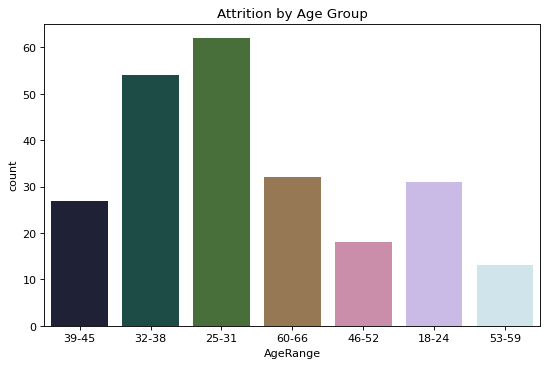

In [7]:
# print(df[(df['Attrition'] == 'Yes')].groupby('AgeRange')['AgeRange'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='AgeRange', palette='cubehelix').set_title('Attrition by Age Group');

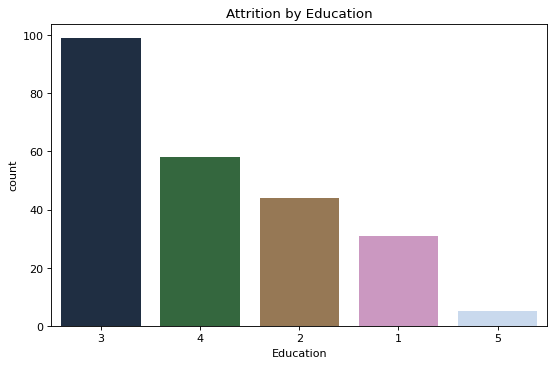

In [8]:
# print(df[(df['Attrition'] == 'Yes')].groupby('Education')['Attrition'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5),dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='Education', order=df['Education'].value_counts().index, 
              palette='cubehelix').set_title('Attrition by Education');

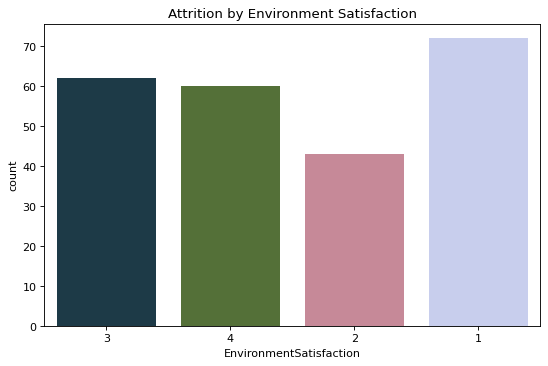

In [9]:
# print(df[(df['Attrition'] == 'Yes')].groupby('EnvironmentSatisfaction')['Attrition'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5),dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='EnvironmentSatisfaction', order=df['EnvironmentSatisfaction']
              .value_counts().index, palette='cubehelix').set_title('Attrition by Environment Satisfaction');

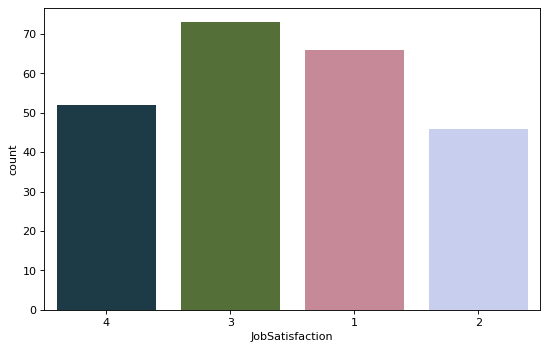

In [10]:
# print(df[(df['Attrition'] == 'Yes')].groupby('JobSatisfaction')['Attrition'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5),dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='JobSatisfaction', order=df['JobSatisfaction'].value_counts().index, palette='cubehelix');

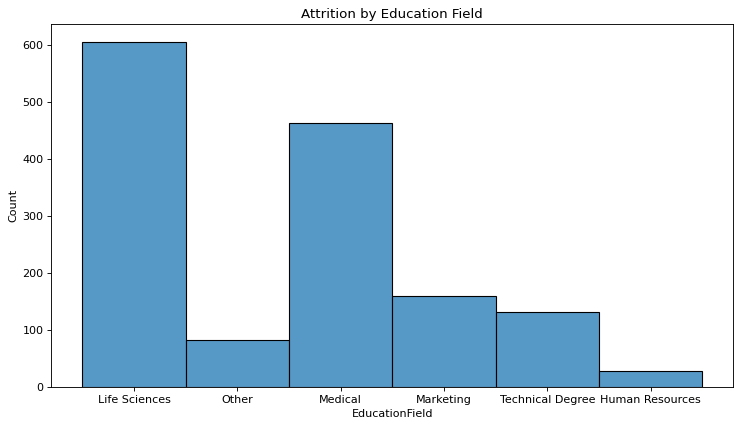

In [ ]:
# print(df[(df['Attrition'] == 'Yes')].groupby('EducationField')['EducationField'].count().sort_values(ascending=False))

plt.figure(figsize=(11,6), dpi=80)
sns.histplot(data=df, x='EducationField').set_title('Attrition by Education Field');

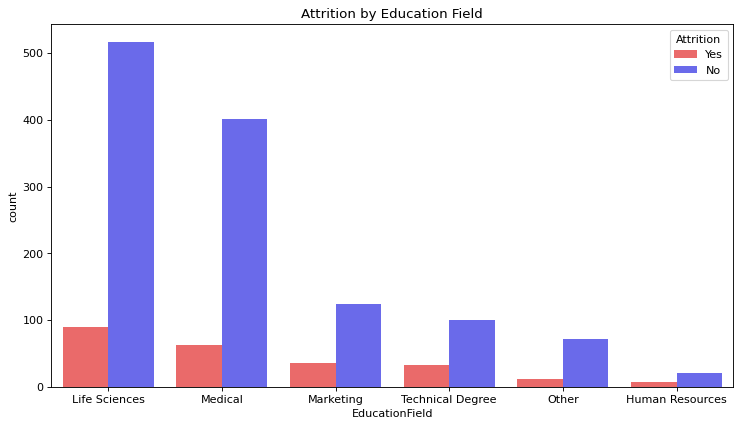

In [ ]:
plt.figure(figsize=(11,6), dpi=80)
sns.countplot(data=df, x='EducationField', hue='Attrition', order = df['EducationField'].value_counts().index, palette='seismic_r').set_title('Attrition by Education Field');

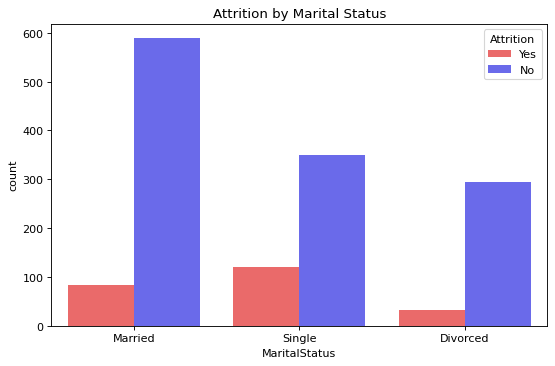

In [ ]:
# print(df[(df['Attrition'] == 'Yes')].groupby('MaritalStatus')['Attrition'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5),dpi=80)
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', order=df['MaritalStatus'].value_counts().index, palette='seismic_r').set_title('Attrition by Marital Status');

In [11]:
df.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
AgeRange                   object
dtype: object

In [14]:
df['Attrition'].replace('Yes', 1, inplace=True)
df['Attrition'].replace('No', 0, inplace=True)
df['Department'].replace('Human Resources', 1, inplace=True)
df['Department'].replace('Research & Development', 2, inplace=True)
df['Department'].replace('Sales', 3, inplace=True)
df['EducationField'].replace('Human Resources', 1, inplace=True)
df['EducationField'].replace('Life Sciences', 2, inplace=True)
df['EducationField'].replace('Marketing', 3, inplace=True)
df['EducationField'].replace('Medical', 4, inplace=True)
df['EducationField'].replace('Other', 5, inplace=True)
df['EducationField'].replace('Technical Degree', 6, inplace=True)
df['MaritalStatus'].replace('Divorced', 1, inplace=True)
df['MaritalStatus'].replace('Married', 2, inplace=True)
df['MaritalStatus'].replace('Single', 3, inplace=True)
df.dtypes

Age                         int64
Attrition                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
AgeRange                   object
dtype: object

In [15]:
x = df.drop(['Attrition', 'AgeRange', 'DistanceFromHome', 'NumCompaniesWorked', 'WorkLifeBalance'], axis=1)
y = df[['Attrition']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)

# check the accuracy on the training set
print('Accuracy =', lr.score(x_train, y_train)*100,'%');


Accuracy = 85.28911564625851 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
lr_y_pred = lr.predict(x_test)
pd.DataFrame(lr_y_pred).head()

,0
0,0
1,0
2,0
3,0
4,0


In [19]:
prob = lr.predict_proba(x_test)
print(prob)

[[0.88809852 0.11190148]
 [0.89226894 0.10773106]
 [0.8488027  0.1511973 ]
 [0.69837919 0.30162081]
 [0.88088139 0.11911861]
 [0.62575687 0.37424313]
 [0.89821967 0.10178033]
 [0.95841683 0.04158317]
 [0.95663234 0.04336766]
 [0.78545236 0.21454764]
 [0.97481259 0.02518741]
 [0.82986167 0.17013833]
 [0.96354114 0.03645886]
 [0.81984403 0.18015597]
 [0.96311734 0.03688266]
 [0.74506329 0.25493671]
 [0.93242633 0.06757367]
 [0.92948248 0.07051752]
 [0.59623262 0.40376738]
 [0.58572456 0.41427544]
 [0.82524584 0.17475416]
 [0.65385368 0.34614632]
 [0.84843423 0.15156577]
 [0.90997477 0.09002523]
 [0.93720237 0.06279763]
 [0.66199143 0.33800857]
 [0.77159759 0.22840241]
 [0.76855857 0.23144143]
 [0.73500245 0.26499755]
 [0.81781825 0.18218175]
 [0.95571046 0.04428954]
 [0.89030765 0.10969235]
 [0.80305538 0.19694462]
 [0.78057563 0.21942437]
 [0.94613964 0.05386036]
 [0.8834325  0.1165675 ]
 [0.93812612 0.06187388]
 [0.94954795 0.05045205]
 [0.94560644 0.05439356]
 [0.64164483 0.35835517]


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Test Accuracy Score:', accuracy_score(y_test, lr_y_pred)*100, '%\n')

print('----------------------Classification Report----------------------\n', classification_report(y_test, lr_y_pred))
print('----------------------Confusion Matrix----------------------\n', confusion_matrix(y_test, lr_y_pred))

Test Accuracy Score: 84.6938775510204 %

----------------------Classification Report----------------------
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       249
           1       0.50      0.07      0.12        45

    accuracy                           0.85       294
   macro avg       0.68      0.53      0.52       294
weighted avg       0.80      0.85      0.79       294

----------------------Confusion Matrix----------------------
 [[246   3]
 [ 42   3]]


In [23]:
# add random values to check the proabily of attrition of the employee

pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8
0,0.552819,-0.496162,0.092149,0.572068,-0.669091,-1.588515,-0.118582,-0.208969,-1.155640
1,-0.435198,-0.496162,0.092149,-0.936344,-0.669091,1.147951,1.248598,0.087370,-0.329380
2,-0.984097,-0.496162,0.092149,0.572068,0.246917,-1.588515,-0.118582,-0.617879,-0.659884
3,-0.215639,-0.496162,0.092149,-0.936344,1.162925,-0.676360,1.248598,0.435373,0.662132
4,-0.544978,-0.496162,1.077303,-0.936344,-1.585099,1.147951,-0.118582,-0.044313,-0.164128
